In [391]:
import numpy as np
import cmath
from math import *
from PIL import Image
import subprocess
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
mpl.rcParams['figure.figsize'] = (15,10) # Para el tamaño de la imagen

([], [])

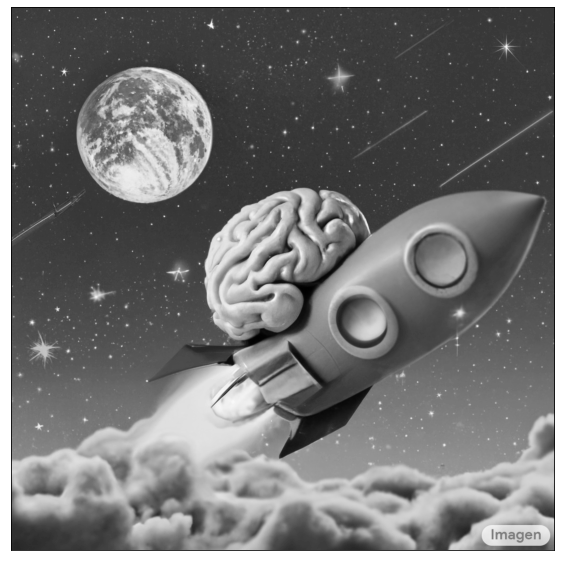

In [276]:
imagen = 'image.jpg'
img = Image.open(imagen).convert('L') #convierte a un mapa de bits (en blanco y negro y cod en bytes)
plt.imshow(img,cmap='gray')
plt.xticks([])
plt.yticks([])

In [300]:
im2array = np.array(img)
np.argwhere(np.ones_like(im2array)).reshape((*np.ones_like(im2array).shape,2))
im2array * np.argwhere(np.ones_like(im2array)).reshape((*np.ones_like(im2array).shape,2))

ValueError: operands could not be broadcast together with shapes (1024,1024) (1024,1024,2) 

In [168]:
resultado = subprocess.run(["ls"], capture_output=True, text=True)
print(resultado.stdout)

Modelo_Pruebas.ipynb
image.jpg



Creo una clase de células ganglionales:

In [240]:
class GCell:
    def __init__(self, posiciones):
        self.recprof = np.vectorize(lambda x,y : cmath.exp(-((x)**2 + (y)**2)) * cmath.exp(2j*(y)))
        self.posiciones = posiciones
        self.output = self.recprof(self.posiciones[:,:,0], self.posiciones[:,:,1])

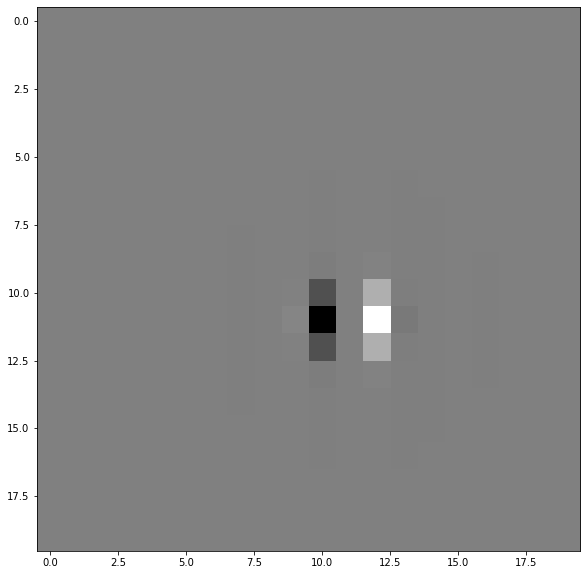

In [277]:
mycell = GCell(pos)
plt.imshow(im2array[500:520,500:520]-(im2array+mycell.output.imag)[500:520,500:520],cmap='gray')
#1000000*mycell.output[0:14][:,0:8]

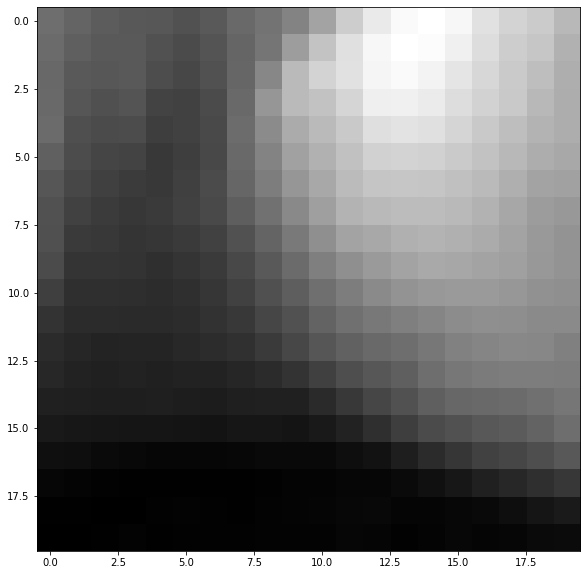

In [278]:
plt.imshow(im2array[500:520,500:520],cmap='gray')

In [301]:
#ACCION x,y,phi, traslación por (x,y) y rotacion por phi
def Accion(posiciones,x,y,phi):
    return np.add(np.matmul(posiciones,np.array([[cos(phi),-sin(phi)],[sin(phi),cos(phi)]])), np.array([x,y]))

def AccionInv(punto,x,y,phi):
    #devuelve el punto con la rotacion inversa y desplazado -
    return ([[cos(phi),-sin(phi)],[sin(phi),cos(phi)]]) @ (punto - np.array([x,y]))


imagen = im2array
pos = Accion(np.array(list(product(np.arange(1,imagen.shape[0]+1),repeat=2))).reshape((imagen.shape[0],imagen.shape[0],2)),512,512,pi)
posiciones = np.array(list(product(np.arange(1,imagen.shape[0]+1),repeat=2))).reshape((imagen.shape[0],imagen.shape[0],2))
posi = AccionInv(pos[0][0],512,512,pi)

def O(x,y,phi,imagen,gcell):
    return np.sum(imagen * gcell.recprof(np.argwhere(np.ones_like(imagen)).reshape((*np.ones_like(imagen).shape,2))[:,:,0],np.argwhere(np.ones_like(imagen)).reshape((*np.ones_like(imagen).shape,2))[:,:,1]))

In [428]:
O(1,2,pi,im2array,mycell,posiciones)

(-3.954998688961749+7.6741824356066894j)

In [85]:
np.dot(np.array([[cos(pi),-sin(pi)],[sin(pi),cos(pi)]]),[[[1,1],[1,2]],[[2,1],[2,2]]])
#np.array([[[1,1],[1,2]],[[2,1],[2,2]]])

array([[[-1., -1.],
        [-2., -1.]],

       [[-1., -2.],
        [-2., -2.]]])

Creo otra clase para V1, que será un 'mapa' de células ganglionales

In [279]:
class V1:
    def __init__(self, height, width, imagen):
        #inicio un tablero con las células ganglionares bajo la acción del grupo E(2), rotaciones y traslaciones en el plano
        # estaria bien hacer que no dependiera de la imagen elegida (se adapte al tamaño)
        #imagen: 
        self.n = imagen.shape[0]
        #posiciones es una discretacizacion del plano por puntos con coordenadas (i,j) habrá que crear células ganglionales con distintas posiciones
        posiciones = np.array(list(product(np.arange(1,self.n+1),repeat=2))).reshape((self.n,self.n,2))
        self.reticulo = None
        pass

In [90]:
myv1 = V1(1,2,im2array)

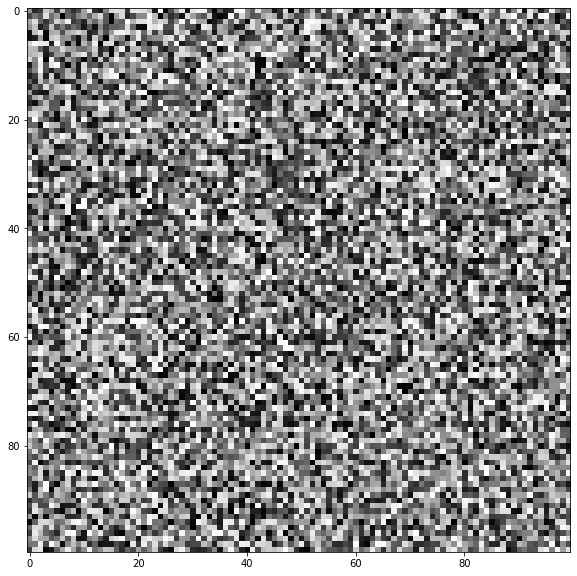

In [621]:
image = np.random.rand(100, 100)
plt.imshow(image, cmap='gray')

In [622]:
class GCell:
    def __init__(self):
        self.recprof = lambda posiciones : np.exp(-((posiciones[:,:,0])**2 + (posiciones[:,:,1])**2)) * np.exp(2j*(posiciones[:,:,1]))
        
def Accion(posiciones,x,y,phi):
    return np.add(np.matmul(posiciones,np.array([[cos(phi),-sin(phi)],[sin(phi),cos(phi)]])), np.array([x,y]))

def AccionInv(posiciones,x,y,phi):
    #devuelve el punto con la rotacion inversa y desplazado -
    return (posiciones - np.array([x,y])) @ np.array([[cos(phi),-sin(phi)],[sin(phi),cos(phi)]])

def O(x,y,phi,imagen,gcell,posiciones):
    #debería cambiar la suma por algo mejor? que aproxime mejor la integral
    return np.sum(imagen * gcell.recprof(posiciones))

class V1:
    def __init__(self, height, width, imagen):
        #inicio un tablero con las células ganglionares bajo la acción del grupo E(2), rotaciones y traslaciones en el plano
        # estaria bien hacer que no dependiera de la imagen elegida (se adapte al tamaño)
        #imagen: 
        self.n = imagen.shape[0]
        #posiciones es una discretacizacion del plano por puntos con coordenadas (i,j) habrá que crear células ganglionales con distintas posiciones
        posiciones = np.array(list(product(np.arange(1,self.n+1),repeat=2))).reshape((self.n,self.n,2))
        self.reticulo = None
        pass

Para x,y fijado, se denotara phip por el phi que da la respuesta máxima, hagamos busqueda para ese phi, discretizado, por pi; hacer un plot para visualizar el espacio de búsqueda

In [623]:
def searchPhiP(x,y,imagen,gcell):
    phip = None
    posiciones = np.argwhere(np.ones_like(imagen)).reshape((*np.ones_like(imagen).shape,2))
    posicionesRotTrans = lambda phi : AccionInv(posiciones,x,y,phi) #rotamos y trasladamos
    espacioBusqueda = np.linspace(0,pi,20) #bajo los cortes
    return espacioBusqueda[np.argmax(np.array([np.abs(O(x,y,phi,imagen,gcell,posicionesRotTrans(phi))) for phi in espacioBusqueda]))]

In [624]:
mycell = GCell()
cx = 50
cy = 50

In [625]:
%time phiP=searchPhiP(cx,cy,image,mycell) #tarda

CPU times: total: 15.6 ms
Wall time: 29.5 ms


Así el punto (x,y) se eleva al punto (x,y,phiP)

In [626]:
phiP

1.4881228359109546

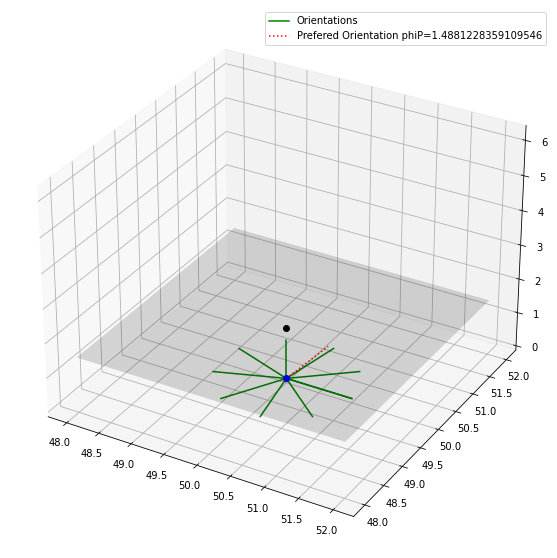

In [627]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

magnitud=1
x = np.linspace(cx-2, cx+2, 100)
y = np.linspace(cy-2, cy+2, 100)
X, Y = np.meshgrid(x, y)


ax.set_zlim(0, 2*np.pi)
for i,phi in enumerate(np.linspace(0,2*pi,10)):
    rayo_x = magnitud * np.cos(phi)
    rayo_y = magnitud * np.sin(phi)
    if i==0: plt.plot(cx + np.array([0, rayo_x]), cy + np.array([0, rayo_y]), 'g',label="Orientations")    
    else: plt.plot(cx + np.array([0, rayo_x]), cy + np.array([0, rayo_y]), 'g') 
        
rayo_x = magnitud * np.cos(phiP)
rayo_y = magnitud * np.sin(phiP)    
plt.plot(cx + np.array([0, rayo_x]), cy + np.array([0, rayo_y]),'r:',label="Prefered Orientation phiP="+str(phiP))
plt.plot(cx,cy,'bo')

ax.plot(cx,cy,phiP,'ko')

Z = phiP*np.ones((100,100))
ax.plot_surface(X,Y,Z,color='k',alpha=0.15)

# Trazar la superficie tridimensional
#ax.plot_surface(X,Y,Z)

plt.legend()
# Mostrar la figura
plt.show()

In [628]:
def allPhiP(imagen,gcell):
    arr = np.argwhere(np.ones_like(imagen)).reshape((*np.ones_like(imagen).shape,2)).reshape(-1, *np.argwhere(np.ones_like(imagen)).reshape((*np.ones_like(imagen).shape,2)).shape[2:])
    prefdOr = {(x,y):searchPhiP(x,y,imagen,gcell) for x,y in arr}
    return prefdOr

In [ ]:
%time mydict = allPhiP(im2array,mycell)

In [ ]:
mydict

In [ ]:
#para no tener que ejecutar lo de arriba para im2array
with open('im2array.json', 'w') as file:
    json.dump(mydict, file, indent=4)

In [ ]:
with open('im2array.json') as file:
    aux = json.load(file)

In [ ]:
def scatterDict(datos):
    x = [coord[0] for coord in datos.keys()]
    y = [coord[1] for coord in datos.keys()]
    z = list(datos.values())
    
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    scatter1 = ax1.scatter(x, y, c=z, cmap='viridis')
    ax1.set_xlabel('Eje X')
    ax1.set_ylabel('Eje Y')
    ax1.set_title('Orientación preferida para cada punto en la imagen')
    plt.colorbar(scatter1, ax=ax1, label='Orientación preferida [0,pi]')
    
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    scatter2 = ax2.scatter(x, y, z, c=z, cmap='viridis')  # El color de los puntos se basa en los valores de z
    ax2.set_xlabel('Eje X')
    ax2.set_ylabel('Eje Y')
    ax2.set_zlabel('PhiP')
    ax2.set_title('Orientación preferida para cada punto en la imagen')
    plt.colorbar(scatter2, ax=ax2, label='Altura = PhiP')
    plt.tight_layout()
    
    plt.show()
    
    
    
scatterDict(mydict)